# Check clustering result
Stefan/Yuzhao Heng
Since Tues. Jan. 25th, 2022


To convert 12-channel ECG signals to discrete symbols:
1. Split signals into fixed-length, 1D signal segments (padded)
2. Cluster the segments, jointly with all 12 channels
3. Assign each 12-lead ECGs with the id by closest cluster centroid


## Setup



In [5]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook


from util import *


from model import Loader, Tokenizer


rcParams['figure.dpi'] = 200
rcParams['font.size'] = 6

seed = config('random_seed')

el = Loader('CHAP_SHAO')
et = Tokenizer(k=8)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Check clustering


### Hierarchical clustering



2022-01-27 11:15:22| Clustering 8 signals => 30048 length-8 segments... 
2022-01-27 11:15:22| Begin clustering with [Agglomerative] and l2 norm threshold [0.0004]
2022-01-27 11:16:35| Clustering completed in 1m13s
2022-01-27 11:16:35| 10033 clusters produced, with counts [2222 1760 1196  743  593  556  417  308  274  265  229  225  200  189
  165  152  142  128  125  124  122  115  107  100   97   93   91   91
   91   83   81   80   80   79   78   77   75   72   72   69   62   61
   59   58   56   56   54   52   48   47   47   45   45   44   44   44
   43   43   43   40   38   38   37   37] 
2022-01-27 11:16:35| R-squared for fitted curve: 0.94897


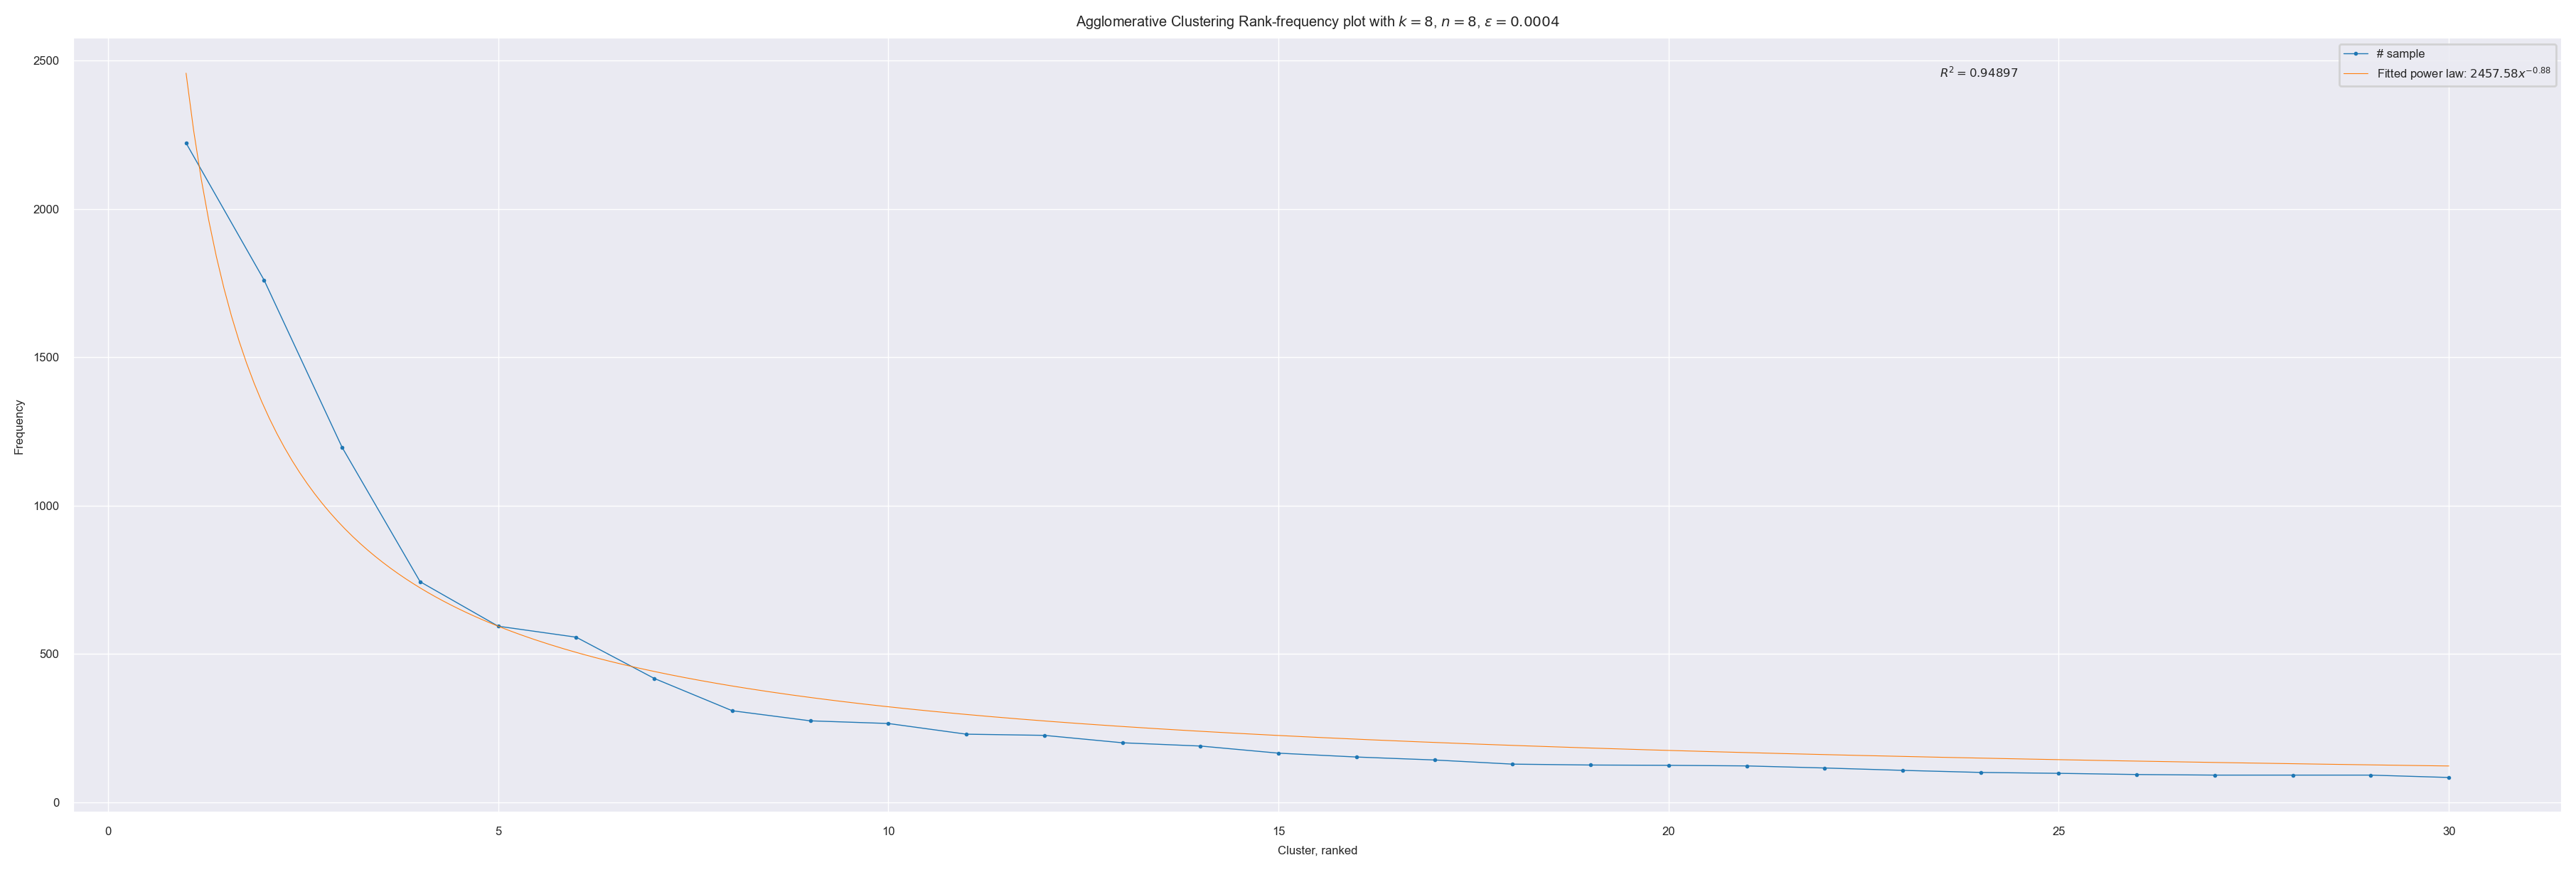

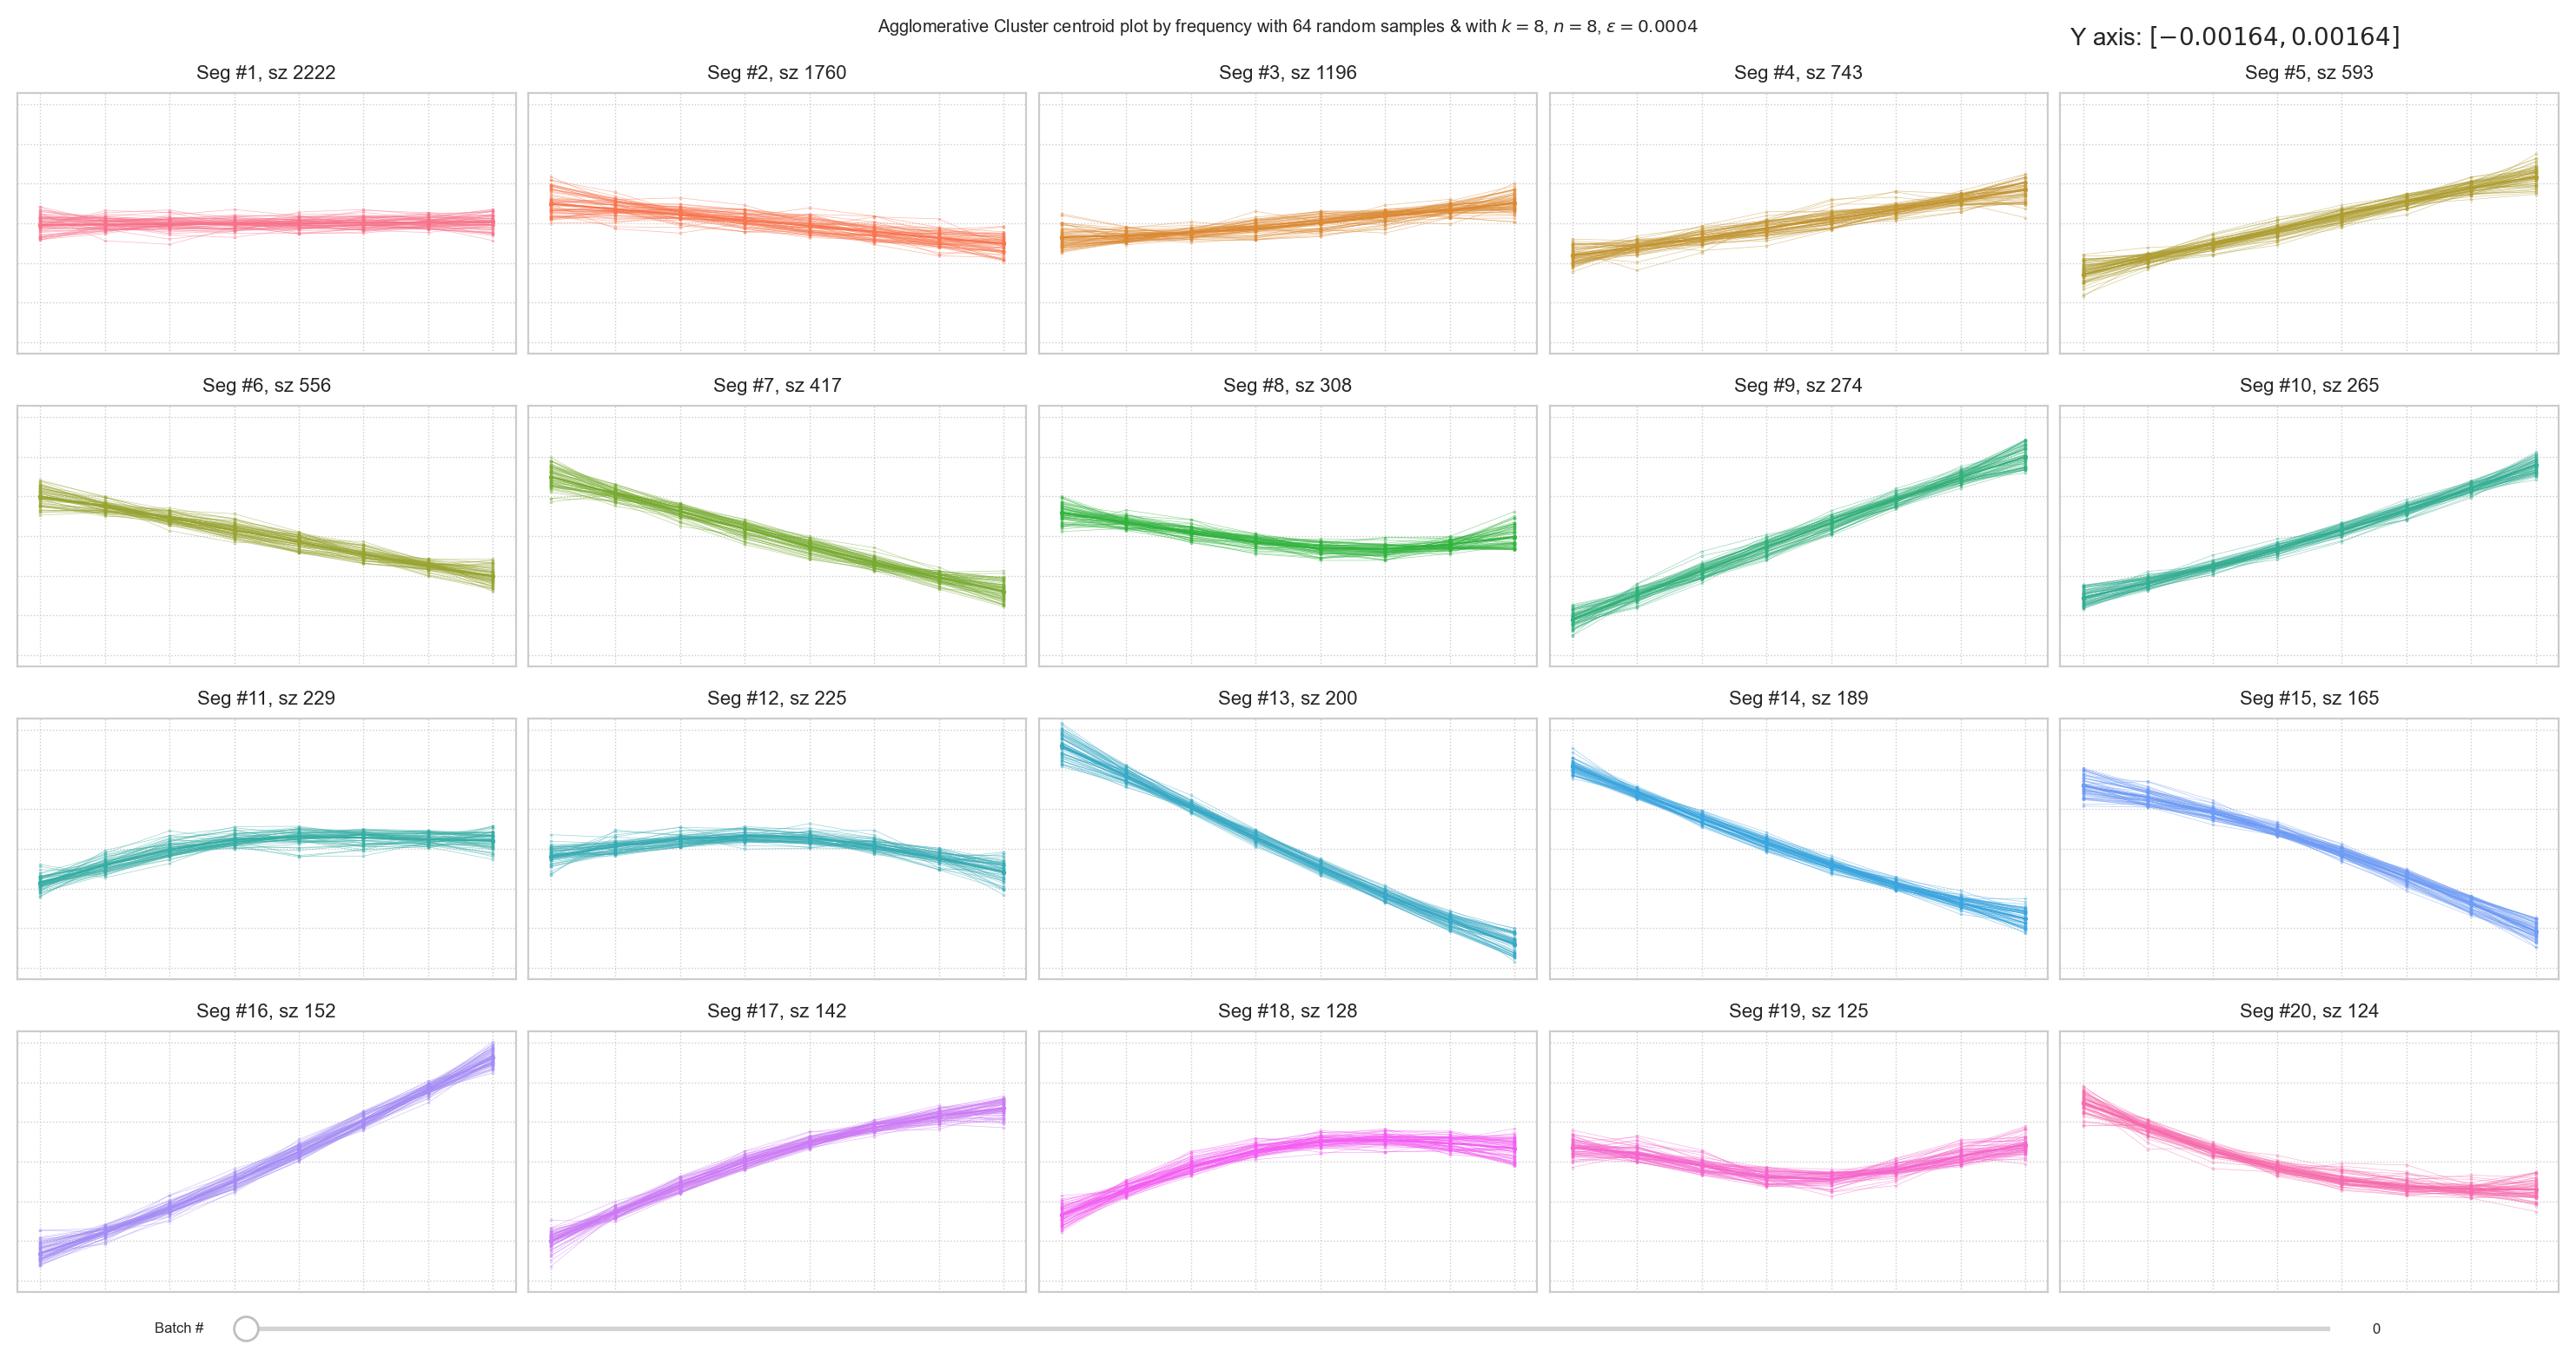

In [6]:
et.fit(
    el[:8], method='hierarchical', cls_kwargs=dict(distance_threshold=4e-4),
    plot_args=dict(
        plot_dist=True,
        plot_segments=(5, 4), seed=seed,
        plot_seg_sample=64
    )
)



## DBSCAN


2022-01-27 11:16:46| Clustering 16 signals => 60096 length-8 segments... 
2022-01-27 11:16:46| Begin clustering with [DBSCAN] and l2 norm threshold [0.008]
2022-01-27 11:21:47| Clustering completed in 5m1s
2022-01-27 11:21:47| 50 clusters produced, with counts [56769    31    24    14    14    12    11    11    10    10     9     8
     8     8     8     7     7     7     7     7     7     6     6     6
     6     6     6     6     6     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     5     5     5     4     4
     4     4] ... and outlier size 2958
2022-01-27 11:21:48| R-squared for fitted curve: 1.0


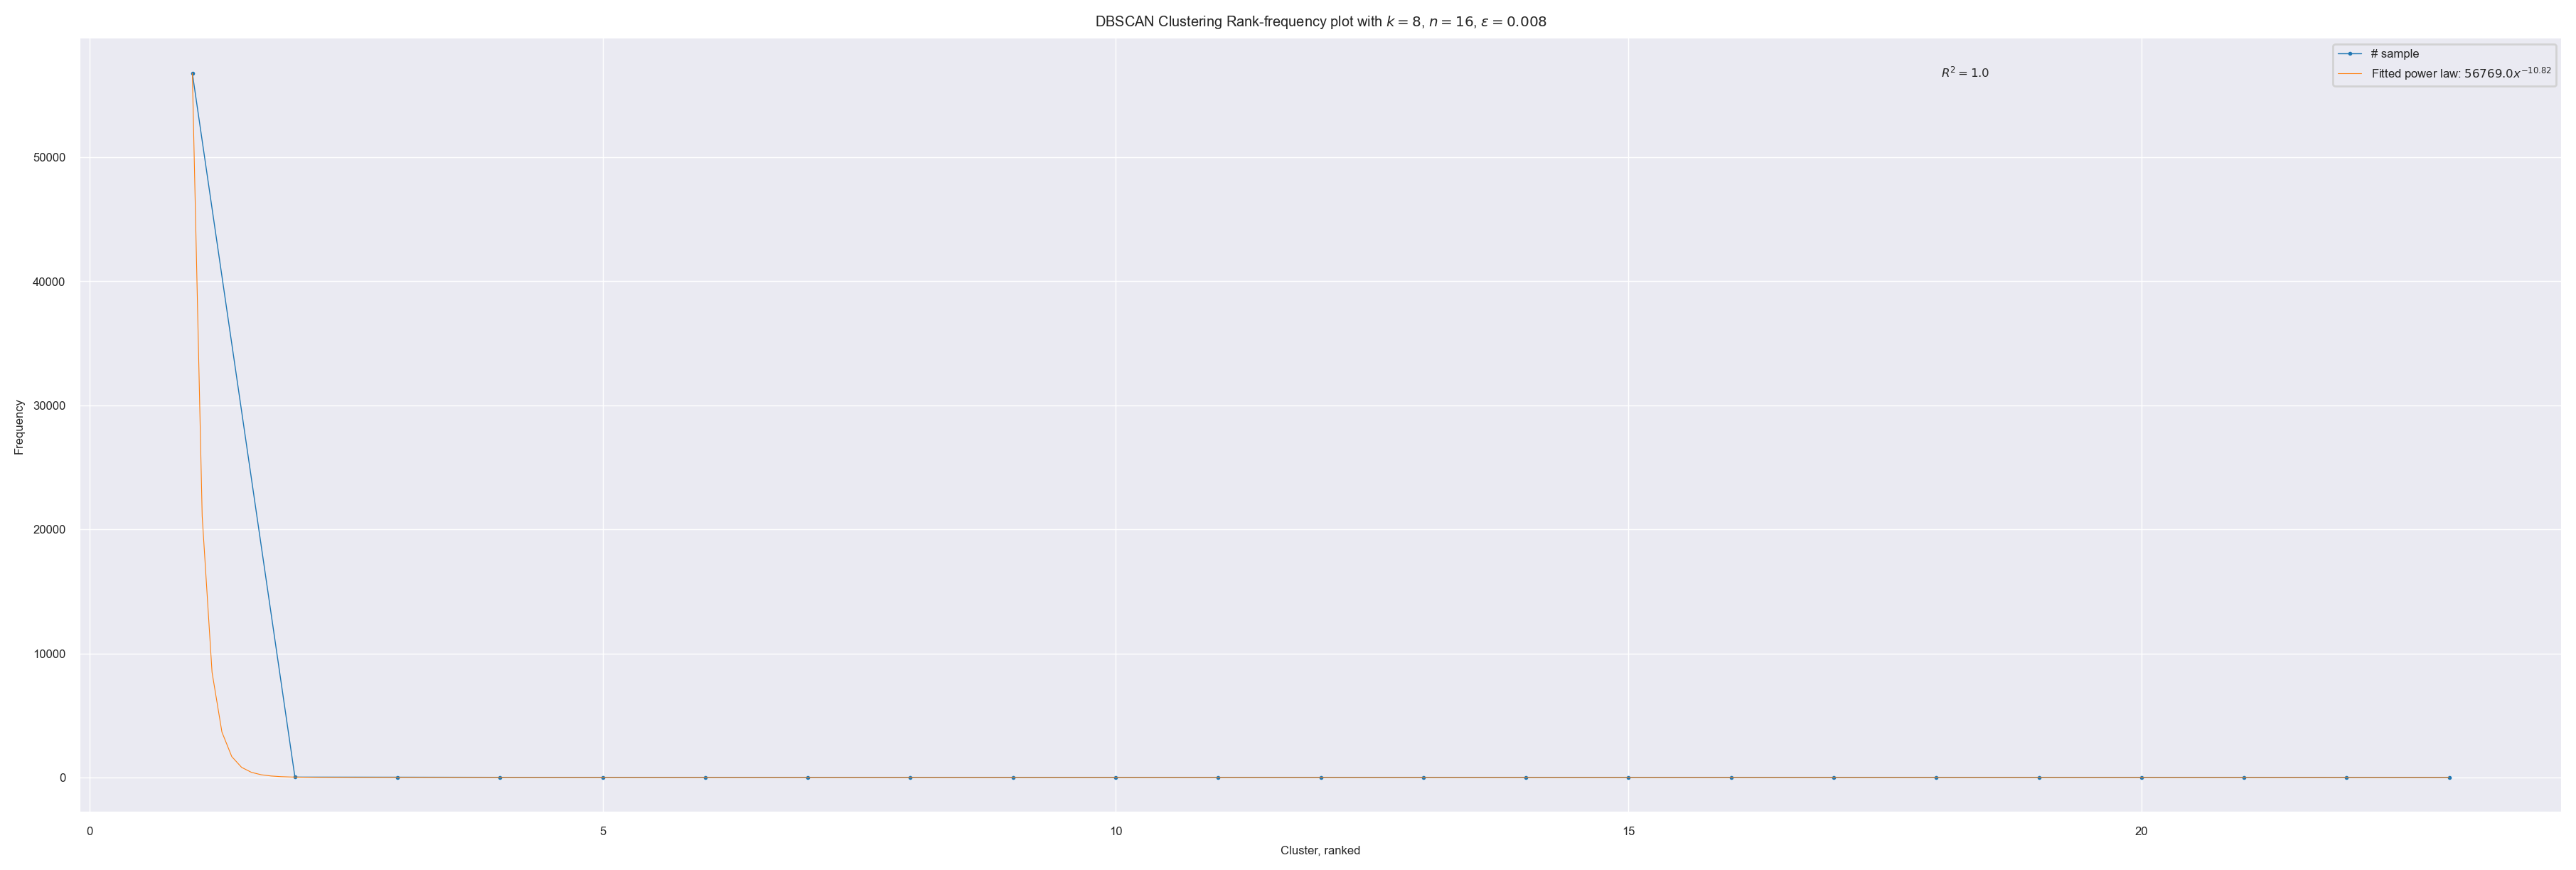

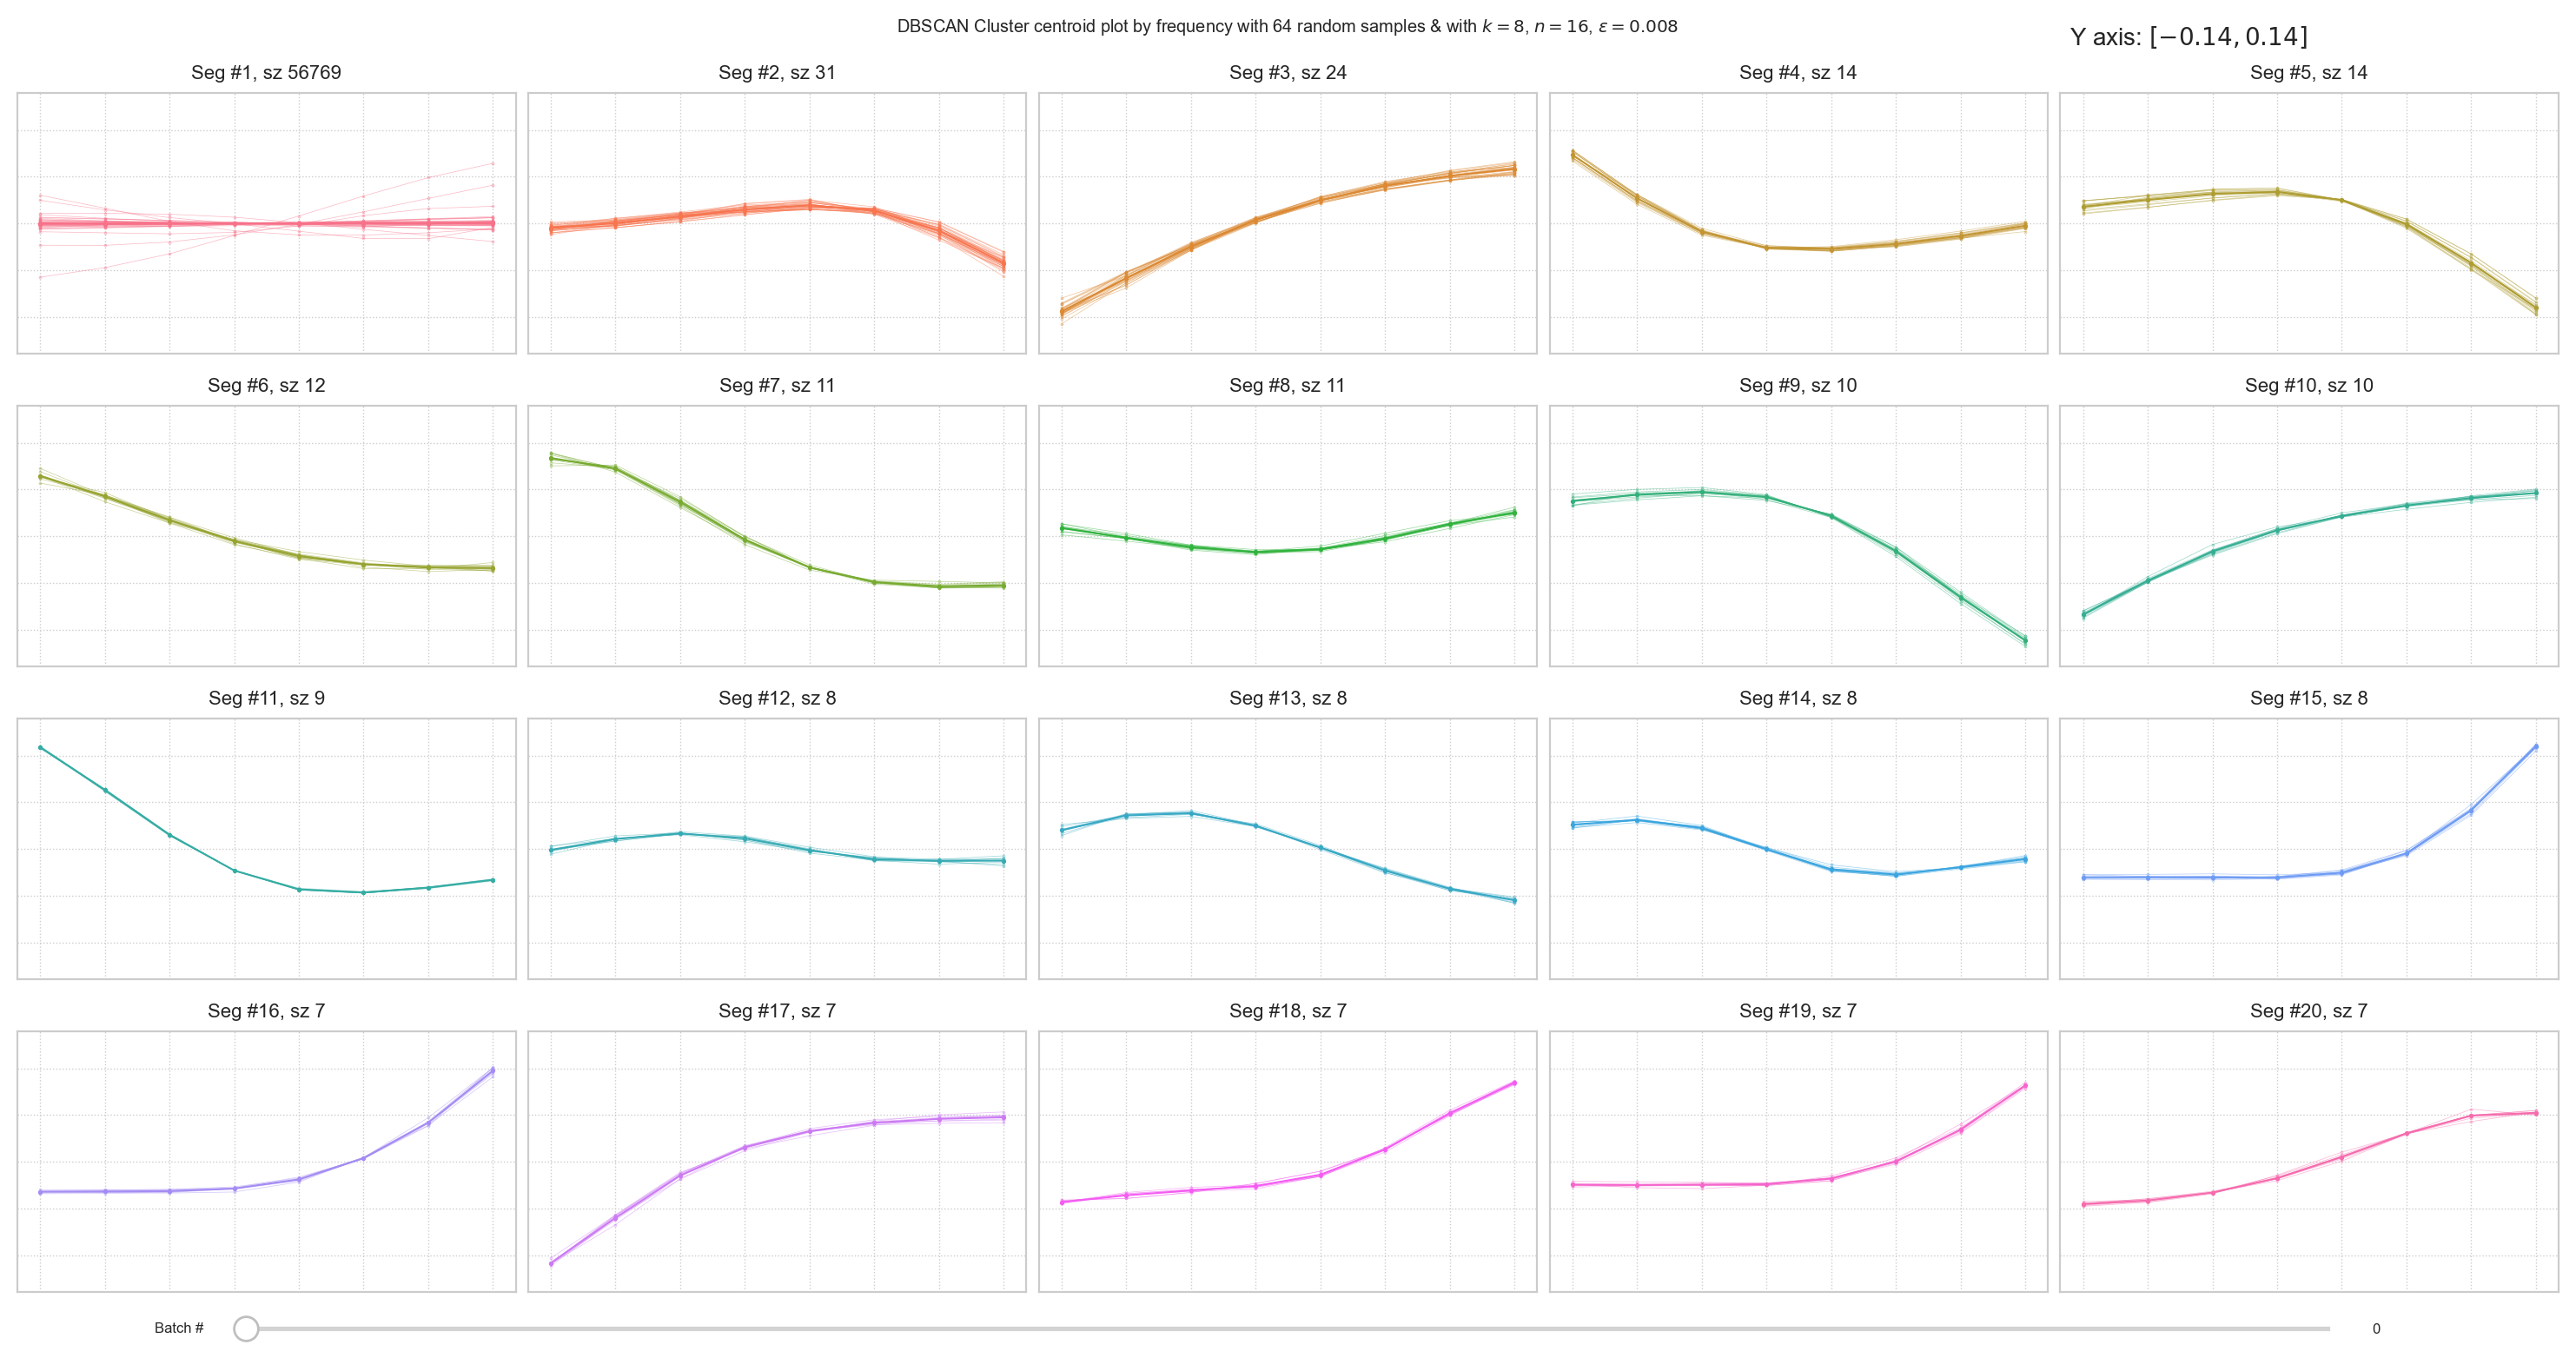

In [7]:
et.fit(
    el[:16], method='dbscan', cls_kwargs=dict(eps=8e-3),
    plot_args=dict(
        plot_dist=True,
        plot_segments=(5, 4), seed=seed,
        plot_seg_sample=64
    )
)



## Birch


2022-01-27 11:21:54| Clustering 16 signals => 60096 length-8 segments... 
2022-01-27 11:21:54| Begin clustering with [Birch] and l2 norm threshold [0.0006]
2022-01-27 11:22:05| Clustering completed in 11s
2022-01-27 11:22:05| 10798 clusters produced, with counts [7292 3471 2857 1639 1552 1160  965  914  825  636  620  595  583  581
  563  560  557  497  455  440  399  378  343  332  268  258  254  245
  241  239  238  232  231  212  197  188  183  179  177  177  171  166
  162  161  150  148  147  146  146  138  127  126  125  124  123  119
  115  114  114  113  112  112  109  108] 
2022-01-27 11:22:05| R-squared for fitted curve: 0.99474


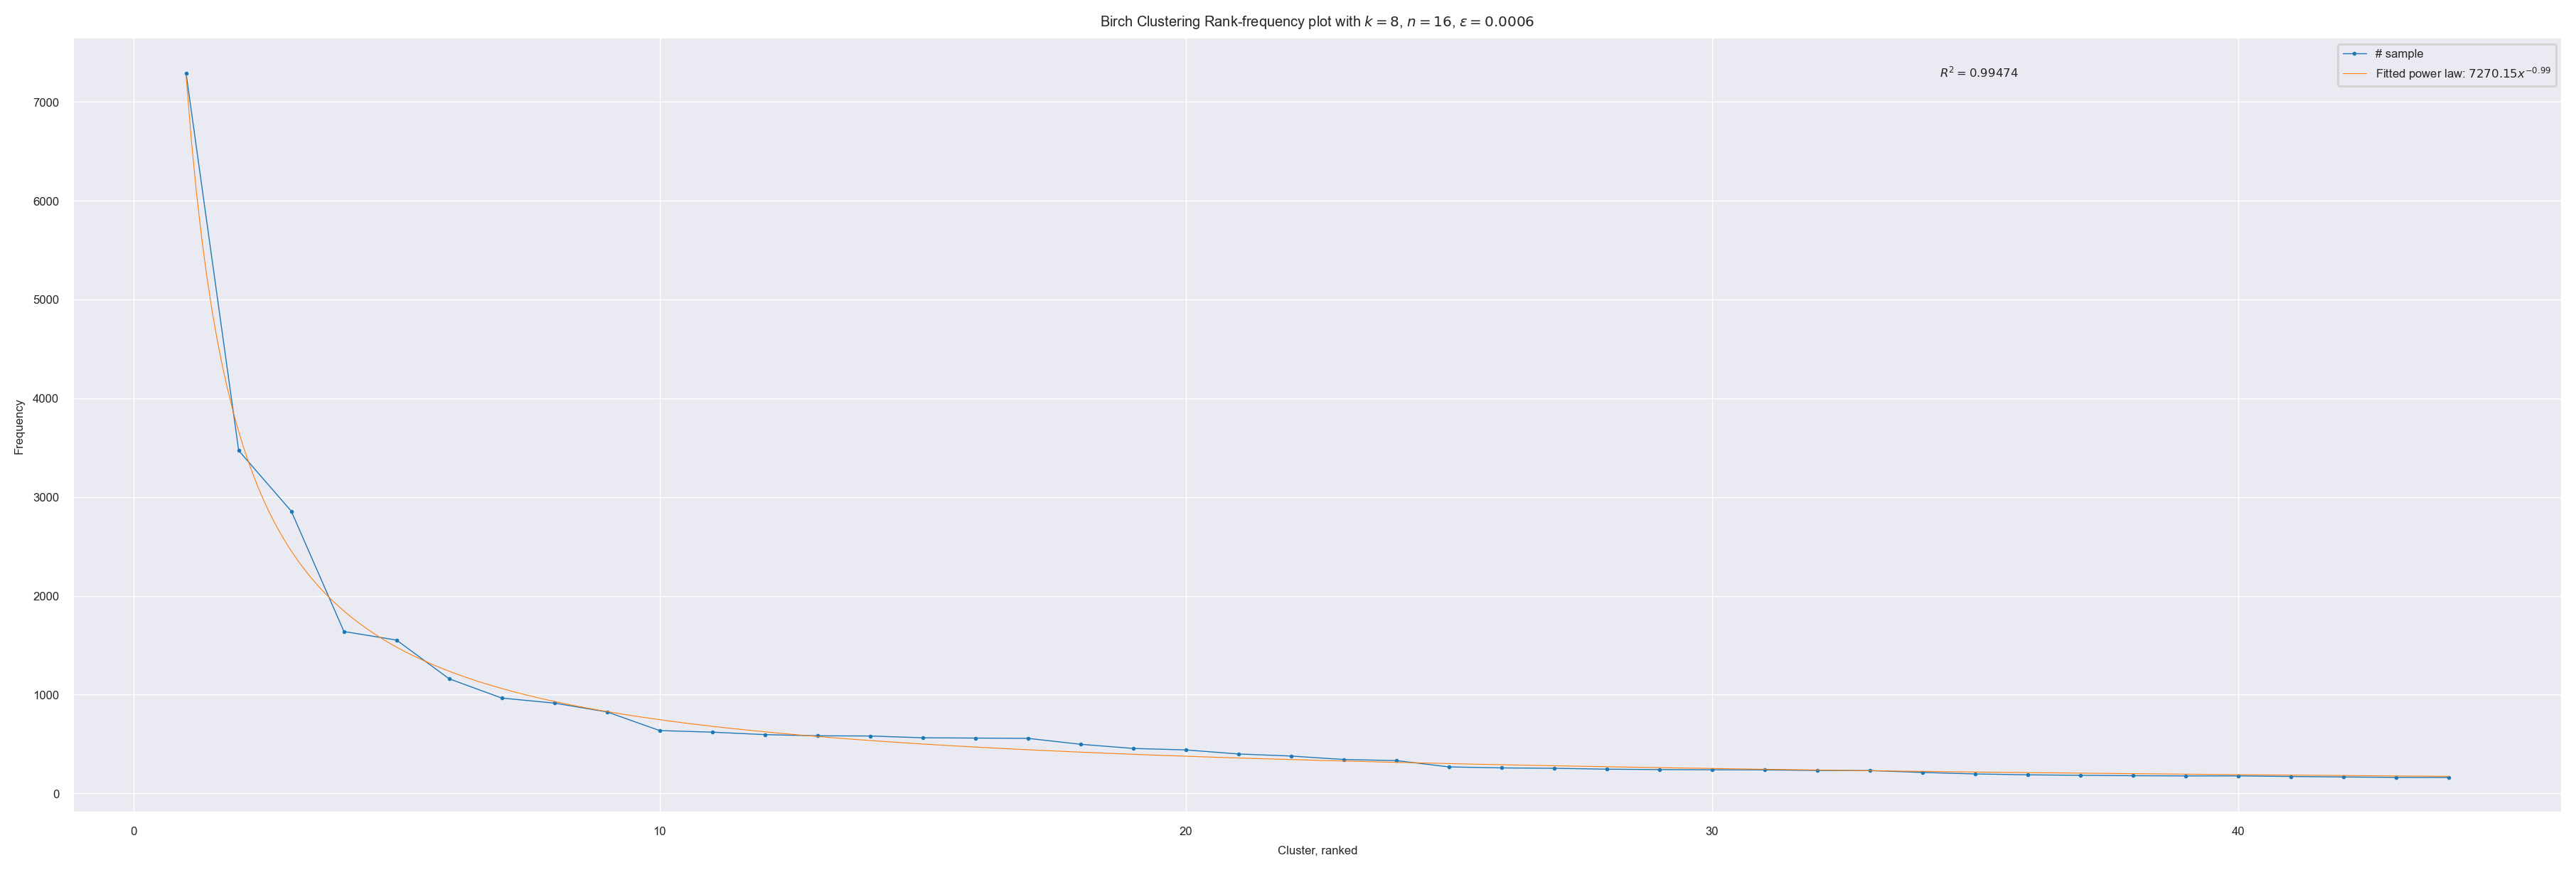

2022-01-27 11:22:10| Clustering labels not consecutive - modifying labels... 


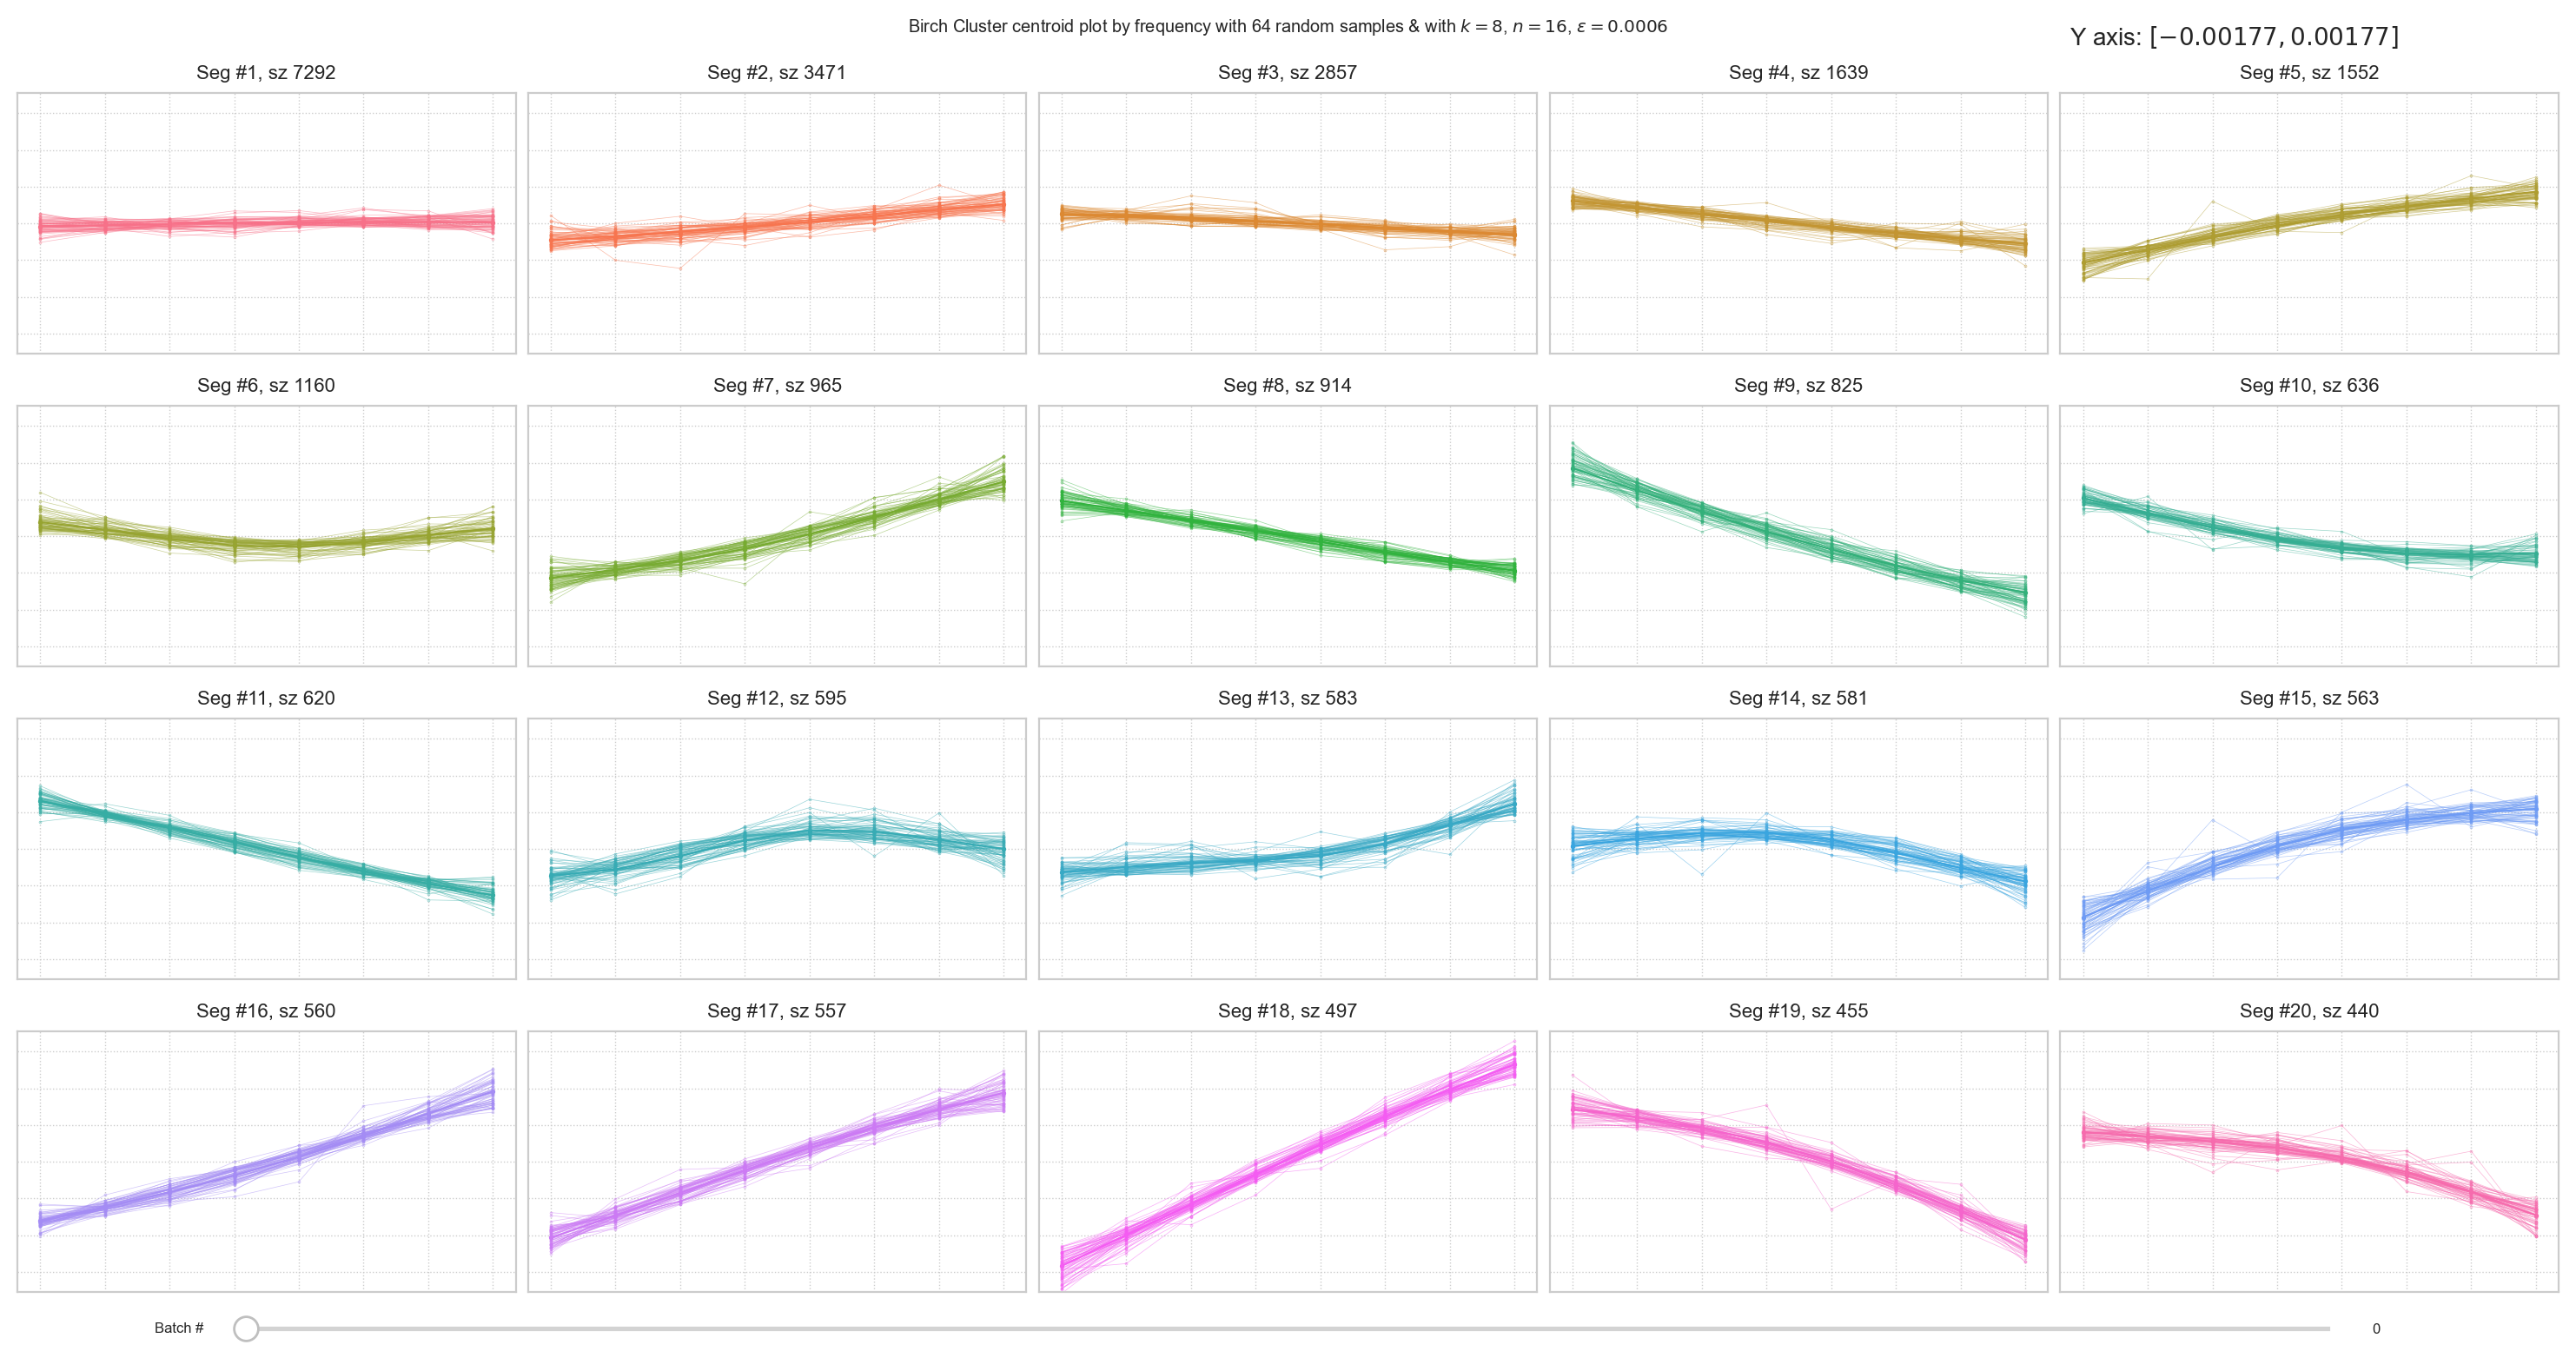

In [8]:
et.fit(
    el[:16], method='birch', cls_kwargs=dict(threshold=6e-4),
    plot_args=dict(
        plot_dist=True,
        plot_segments=(5, 4), seed=seed,
        plot_seg_sample=64
    )
)



## K-means


2022-01-27 11:22:16| Clustering 16 signals => 60096 length-8 segments... 
2022-01-27 11:22:16| Begin clustering with [K-means] and l2 norm threshold [256]
2022-01-27 11:22:39| Clustering completed in 22s
2022-01-27 11:22:39| 256 clusters produced, with counts [24451  8262  6386  3550  3097  2139  1651  1104   979   523   492   374
   362   311   242   242   209   205   197   194   139   137   136   124
   119   111   106    99    97    95    86    84    82    79    76    75
    71    70    66    66    63    63    61    60    57    57    50    50
    48    48    45    43    42    42    40    40    40    39    38    38
    36    35    35    34] 
2022-01-27 11:22:39| R-squared for fitted curve: 0.99431


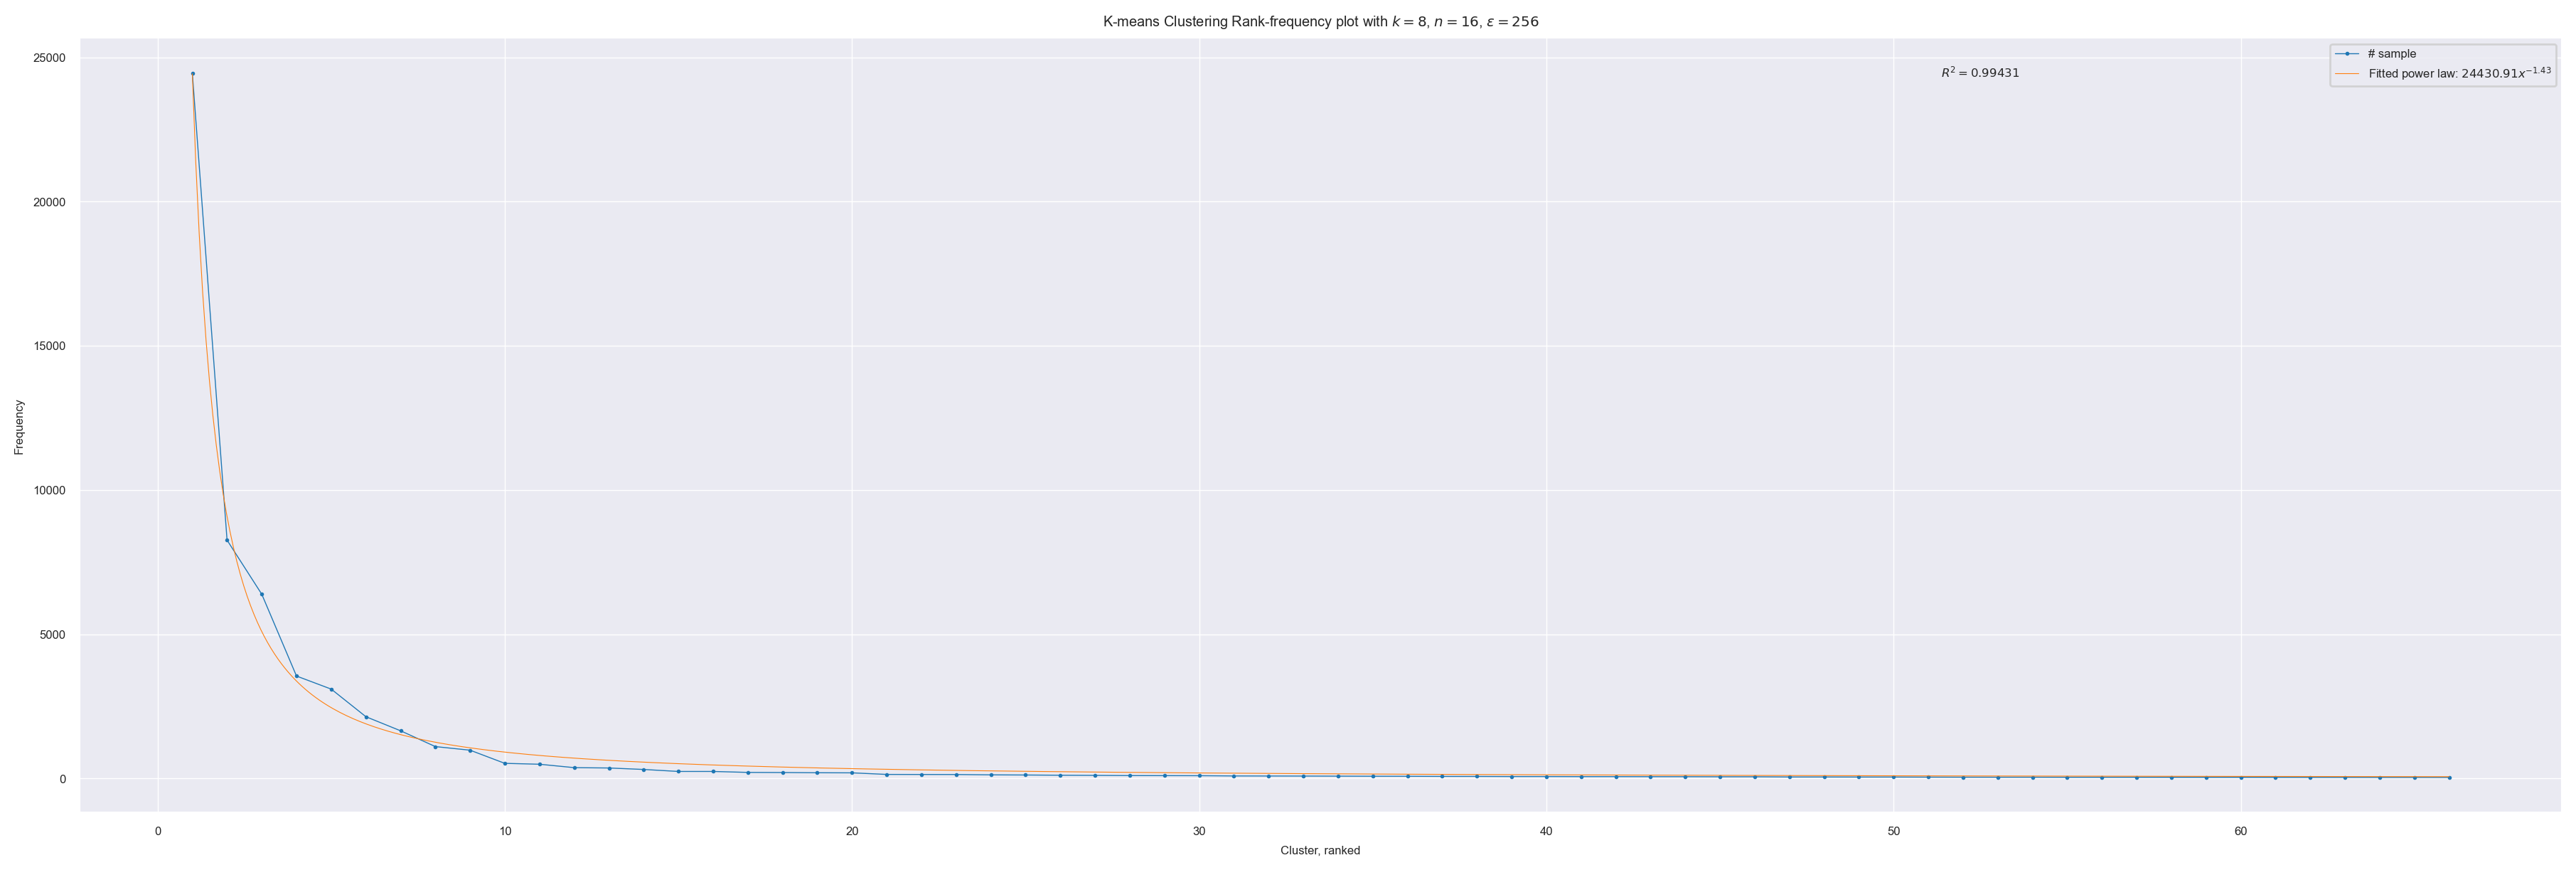

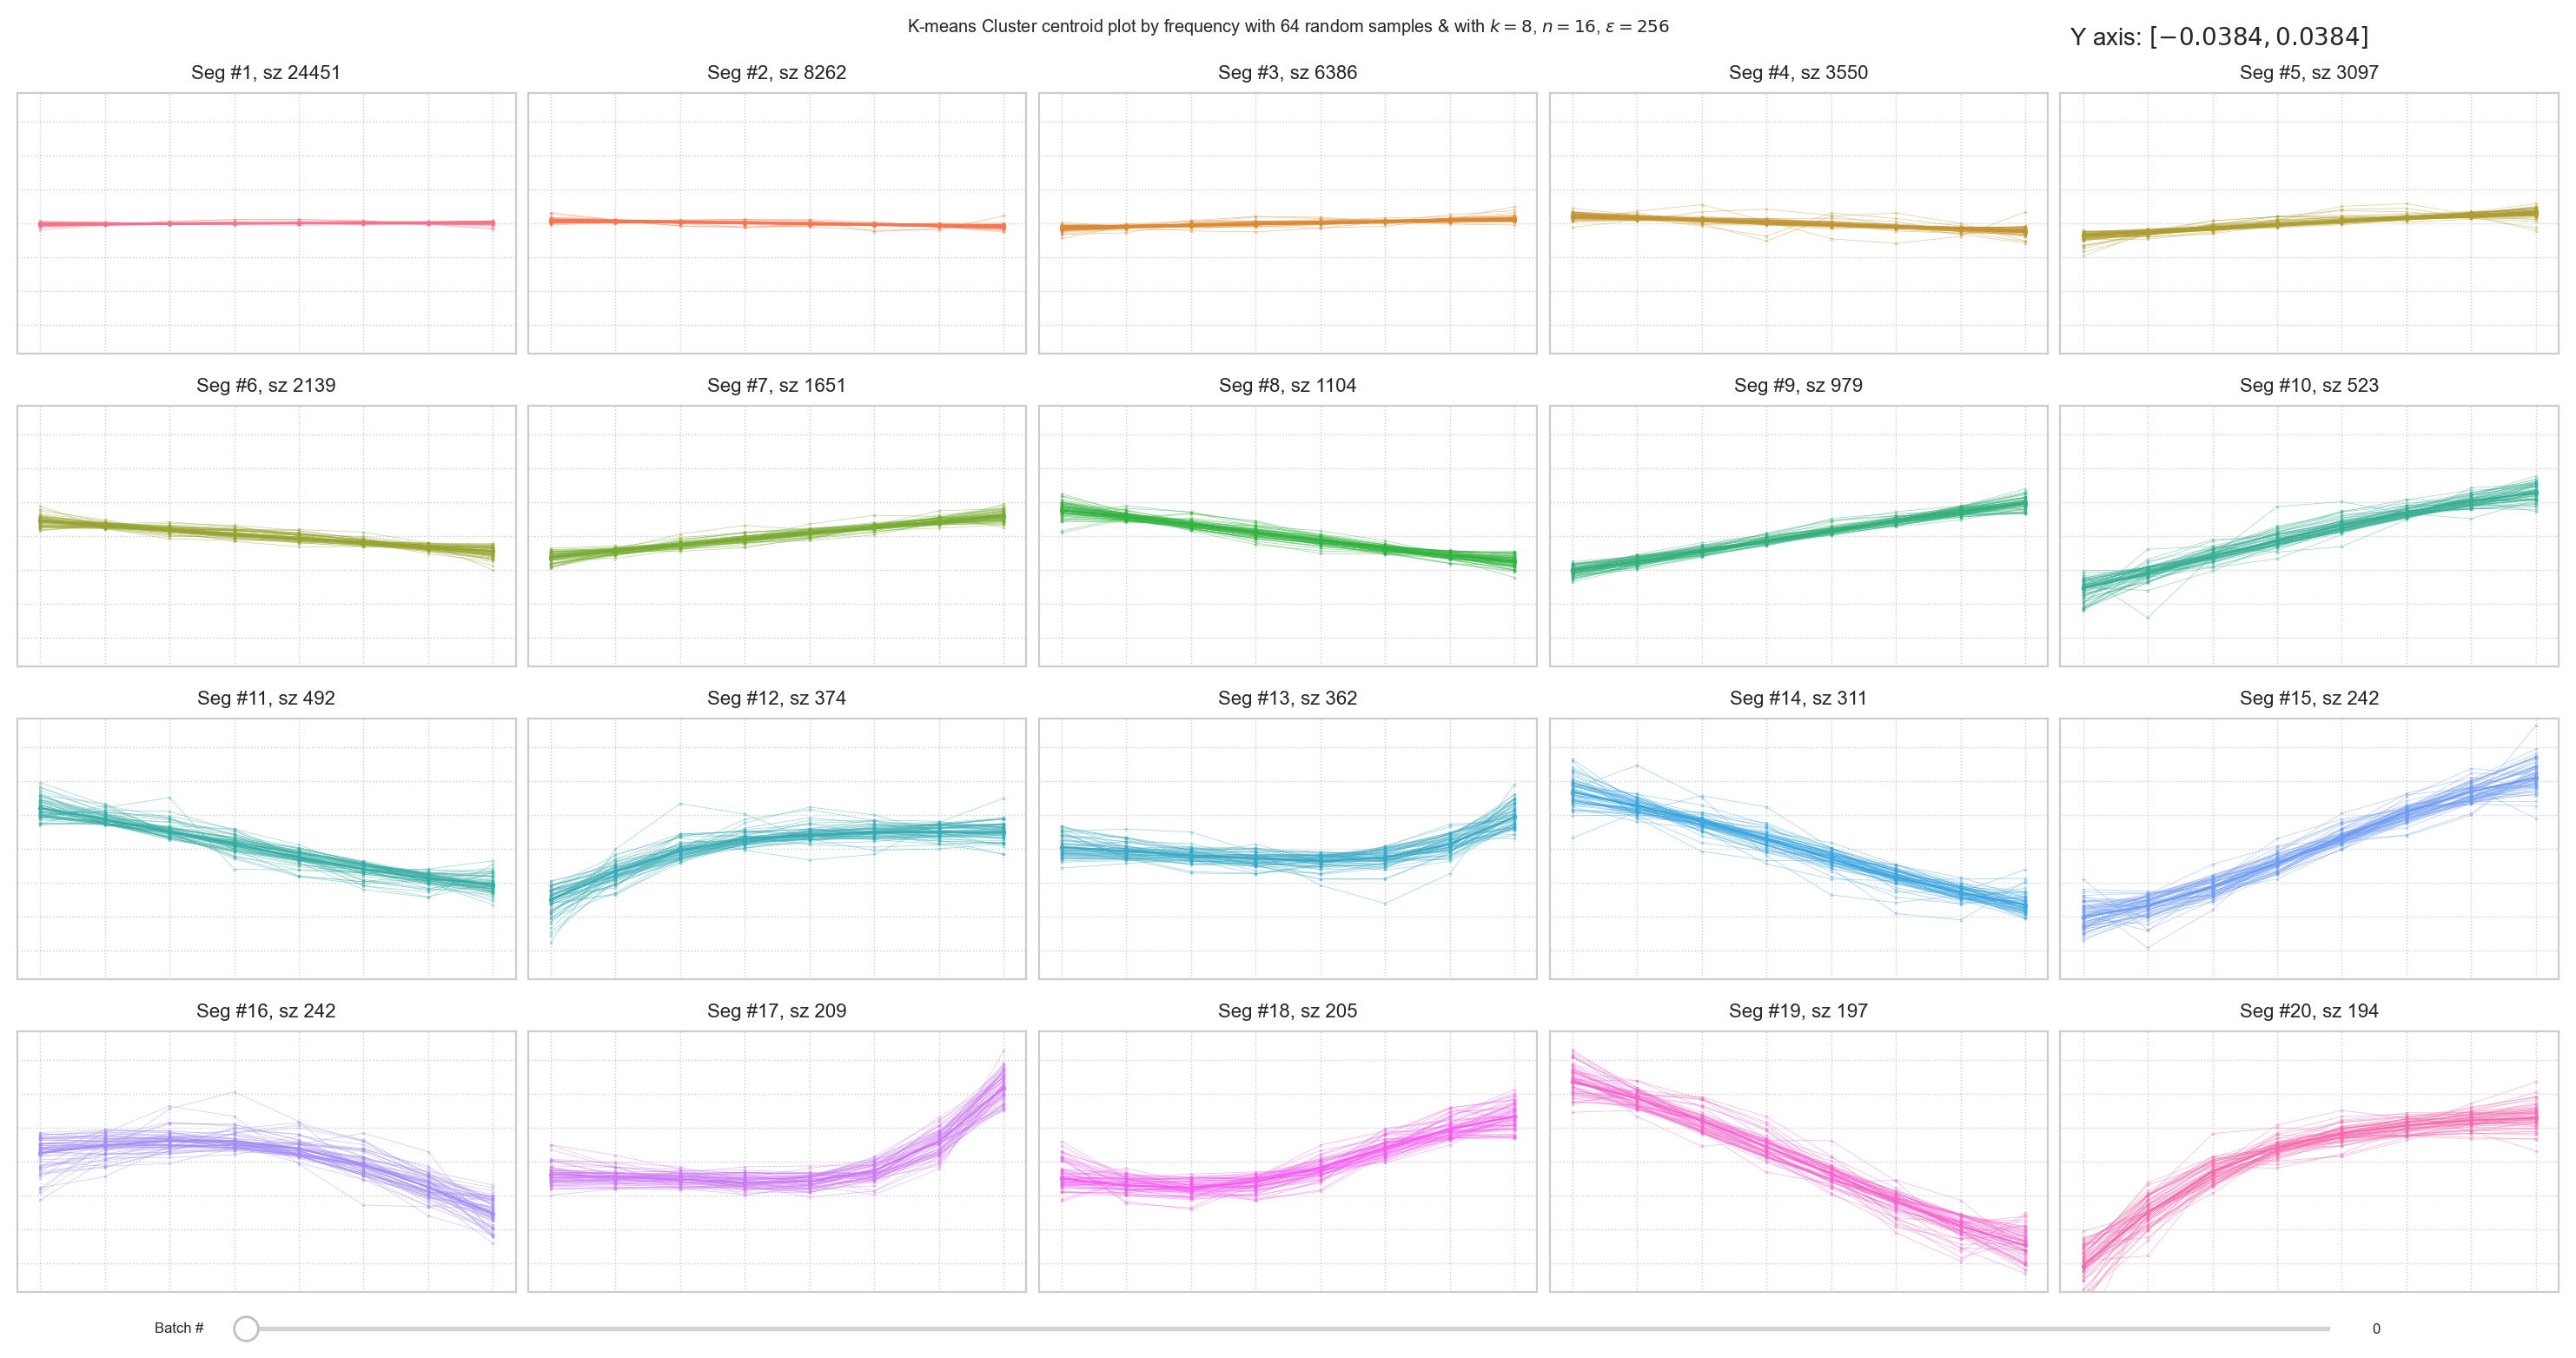

In [9]:
et.fit(
    el[:16], method='kmeans', cls_kwargs=dict(n_clusters=256, random_state=config('random_seed')),
    plot_args=dict(
        plot_dist=True,
        plot_segments=(5, 4), seed=seed,
        plot_seg_sample=64
    )
)

